In [19]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\iifor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\iifor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\iifor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [24]:
# Load the dataset
df = pd.read_csv('AmazonReviews.csv')

# Function for text preprocessing
def preprocess_text(text):

# Convert text to lowercase
    text = text.lower()

# Remove punctuation
    text =text.translate(str.maketrans('', '', string.punctuation))
    
# Tokenize the text
    tokens = word_tokenize(text)
    
# Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
# Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
# Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text


In [25]:
# Apply text preprocessing to 'Text' column
df['Text'] = df['Text'].apply(preprocess_text)

# Apply text preprocessing to 'Summary' column
df['Summary'] = df['Summary'].apply(preprocess_text)

# Save the preprocessed data to a new CSV file
df.to_csv('AmazonReviews_Preprocessed.csv', index=False)

# Display the first few rows of the preprocessed DataFrame
print(df.head())

   Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  good quality dog food  bought several vitality canned dog food produc...  
1 

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the preprocessed dataset
df = pd.read_csv('AmazonReviews_Preprocessed.csv')

# Create a TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'Text' column to obtain the TF-IDF matrix
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Text'])

# Convert the TF-IDF matrix to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Print the DataFrame
print(tfidf_df)

      026  028  030  042608460503br  0472066978  05g  0738551856  080jar  0br  \
0     0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
1     0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
2     0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
3     0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
4     0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
...   ...  ...  ...             ...         ...  ...         ...     ...  ...   
996   0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
997   0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
998   0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
999   0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   
1000  0.0  0.0  0.0             0.0         0.0  0.0         0.0     0.0  0.0   

      0gbr  ...  zevia  zin

In [31]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tabulate import tabulate
import nltk

# Download the VADER lexicon
nltk.download('vader_lexicon')

# Load the preprocessed dataset
df = pd.read_csv('AmazonReviews_Preprocessed.csv')

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis using VADER
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each review in the 'Text' column
df['Sentiment'] = df['Text'].apply(analyze_sentiment)

# Display the sentiment analysis results in a table format
print(tabulate(df[['Text', 'Sentiment']], headers='keys', tablefmt='fancy_grid'))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\iifor\AppData\Roaming\nltk_data...
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Load the dataset into a pandas DataFrame
data = pd.read_csv("AmazonReviews.csv")

# Split data into training and testing sets
X = data['Text']  # Assuming 'Text' column contains the text data
y = data['Score']  # Assuming 'Score' column contains the sentiment labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Extract features (TF-IDF representation)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize classifiers
nb_classifier = MultinomialNB()
svm_classifier = SVC(kernel='linear')

# Train classifiers
nb_classifier.fit(X_train_tfidf, y_train)
svm_classifier.fit(X_train_tfidf, y_train)

# Predict sentiment using classifiers
nb_predictions = nb_classifier.predict(X_test_tfidf)
svm_predictions = svm_classifier.predict(X_test_tfidf)

# Calculate classification report for Naive Bayes
nb_classification_report = classification_report(y_test, nb_predictions)

# Calculate classification report for SVM
svm_classification_report = classification_report(y_test, svm_predictions)

# Print classification report for Naive Bayes
print("\nClassification Report for Naive Bayes:")
print(nb_classification_report)

# Print classification report for SVM
print("\nClassification Report for SVM:")
print(svm_classification_report)


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        48
           5       0.66      1.00      0.80       265

    accuracy                           0.66       401
   macro avg       0.13      0.20      0.16       401
weighted avg       0.44      0.66      0.53       401


Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.50      0.06      0.11        33
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        48
           5       0.67      1.00      0.80       265

    accuracy                           0.67       401
   macro avg       0.23      0.21      0.18       401
weigh

In [36]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Load the dataset into a pandas DataFrame
data = pd.read_csv("AmazonReviews.csv")

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis using VADER
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each review in the dataset
data['VADER Sentiment'] = data['Text'].apply(analyze_sentiment)

# Print the sentiment analysis results
print(data[['Text', 'VADER Sentiment']])

                                                   Text VADER Sentiment
0     I have bought several of the Vitality canned d...        positive
1     Product arrived labeled as Jumbo Salted Peanut...        negative
2     This is a confection that has been around a fe...        positive
3     If you are looking for the secret ingredient i...         neutral
4     Great taffy at a great price.  There was a wid...        positive
...                                                 ...             ...
996   Man what can i say, this salsa is the bomb!! i...        positive
997   this sauce is so good with just about anything...        positive
998   Not hot at all. Like the other low star review...         neutral
999   I have to admit, I was a sucker for the large ...        negative
1000  I never in my life tasted such a good babka it...        positive

[1001 rows x 2 columns]


In [38]:
!pip install tabulate

import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from tabulate import tabulate

# Load the dataset into a pandas DataFrame
data = pd.read_csv("AmazonReviews.csv")

# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis using VADER
def analyze_sentiment(text):
    scores = sid.polarity_scores(text)
    compound_score = scores['compound']
    if compound_score > 0.05:
        return 'positive'
    elif compound_score < -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis to each review in the dataset
data['VADER Sentiment'] = data['Text'].apply(analyze_sentiment)

# Print the sentiment analysis results in a table format
print(tabulate(data[['Text', 'VADER Sentiment']], headers="keys", tablefmt="grid"))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Load the dataset into a pandas DataFrame
data = pd.read_csv("AmazonReviews.csv")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Score'], test_size=0.4, random_state=42)

# Extract features (TF-IDF representation)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

# Predict using Naive Bayes classifier
nb_predicted = nb_clf.predict(X_test_tfidf)

# Calculate classification report for Naive Bayes
nb_report = classification_report(y_test, nb_predicted)

# Print classification report for Naive Bayes
print("\nClassification Report for Naive Bayes:")
print(nb_report)


Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        48
           5       0.66      1.00      0.80       265

    accuracy                           0.66       401
   macro avg       0.13      0.20      0.16       401
weighted avg       0.44      0.66      0.53       401




Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        48
           5       0.66      1.00      0.80       265

    accuracy                           0.66       401
   macro avg       0.13      0.20      0.16       401
weighted avg       0.44      0.66      0.53       401


Classification Report for SVM:
              precision    recall  f1-score   support

           1       0.50      0.06      0.11        33
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        48
           5       0.67      1.00      0.80       265

    accuracy                           0.67       401
   macro avg       0.23      0.21      0.18       401
weigh

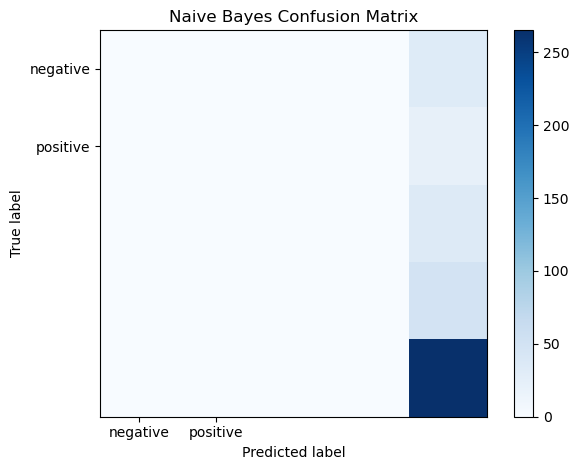

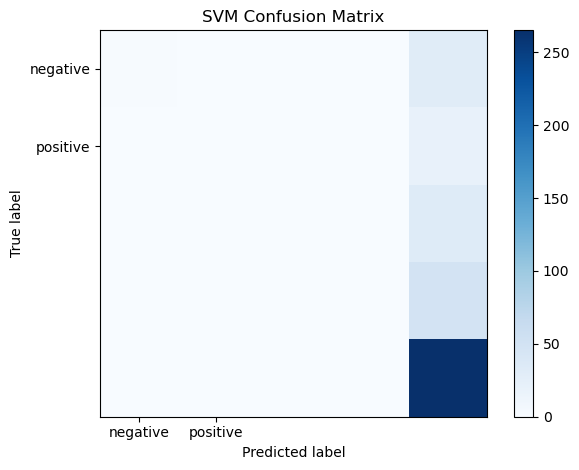

Naive Bayes Classifier Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00        33
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        48
           5       0.66      1.00      0.80       265

    accuracy                           0.66       401
   macro avg       0.13      0.20      0.16       401
weighted avg       0.44      0.66      0.53       401


SVM Classifier Report:
              precision    recall  f1-score   support

           1       0.50      0.06      0.11        33
           2       0.00      0.00      0.00        21
           3       0.00      0.00      0.00        34
           4       0.00      0.00      0.00        48
           5       0.67      1.00      0.80       265

    accuracy                           0.67       401
   macro avg       0.23      0.21      0.18       401
weighted avg       0.4

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Load the dataset into a pandas DataFrame
data = pd.read_csv("AmazonReviews.csv")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Text'], data['Score'], test_size=0.4, random_state=42)

# Extract features (TF-IDF representation)
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train Naive Bayes classifier
nb_clf = MultinomialNB()
nb_clf.fit(X_train_tfidf, y_train)

# Initialize and train SVM classifier
svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train_tfidf, y_train)

# Predict using classifiers
nb_predicted = nb_clf.predict(X_test_tfidf)
svm_predicted = svm_clf.predict(X_test_tfidf)

# Calculate classification report for Naive Bayes
nb_report = classification_report(y_test, nb_predicted)

# Calculate classification report for SVM
svm_report = classification_report(y_test, svm_predicted)

# Print classification report for Naive Bayes
print("\nClassification Report for Naive Bayes:")
print(nb_report)

# Print classification report for SVM
print("\nClassification Report for SVM:")
print(svm_report)

# Calculate confusion matrix for Naive Bayes
nb_cm = confusion_matrix(y_test, nb_predicted)

# Calculate confusion matrix for SVM
svm_cm = confusion_matrix(y_test, svm_predicted)

# Plot confusion matrix for Naive Bayes
def plot_confusion_matrix(cm, classes, title):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()

# Plot confusion matrix for Naive Bayes
plot_confusion_matrix(nb_cm, classes=['negative', 'positive'], title='Naive Bayes Confusion Matrix')

# Plot confusion matrix for SVM
plot_confusion_matrix(svm_cm, classes=['negative', 'positive'], title='SVM Confusion Matrix')

print("Naive Bayes Classifier Report:")
print(nb_report)

print("\nSVM Classifier Report:")
print(svm_report)

In [44]:
# LINA BATRISYIA BINTI MOHD MAZLAN (IS01081499)
# DAYANG NURIN SYAZWINA BINTI RAMLAN (IS01081494)

#Lexicon-based technique (TextBlob, VADER): Lexicon-based technique (TextBlob, VADER):
#Strengths:
#Interpretability: Lexicon-based algorithms such as TextBlob and VADER produce sentiment scores that are simple to understand.
#Lexicon-based models are often faster to process since they use pre-defined vocabularies
# Weaknesses:
#Limited Context Understanding: Lexicon-based models may struggle to recognize context, sarcasm, or complex phrases, resulting in erroneous sentiment analysis.
#Dependence on Lexicons: The accuracy of lexicon-based models is largely reliant on the quality and coverage of the sentiment lexicon utilized, which may not capture all possible sentiment expressions.


#Logistic Regression, Random Forest, and Support Vector Machines are examples of machine learning-based approaches.
#Strengths:
#Contextual Understanding: Machine learning models can detect complex patterns in data, helping them to better comprehend the context and semantics of text.
#Customization: These models may be enhanced using characteristics derived from text data, allowing for more precise control over the categorization process.
#Weaknesses:
#Data Dependency: Machine learning models require labeled training data, which may be expensive or time-consuming to collect and annotate.
#Computational Complexity: Training and tuning machine learning models can be computationally intensive, especially for large datasets and complex models.